# Removing rows 

In [1]:
import pandas as pd
import joblib as joblib
from joblib import dump, load
import seaborn as sbn

full_df = joblib.load('/home/simplon/full_df_nutriscore2.joblib')


df = full_df.drop(columns=['main_category_en', 'nutriscore_score', 'product_name', 
              'categories', 'categories_tags','main_category','main_category_en',
              'ingredients_text', 'labels','categories_en', 'nutrition-score-fr_100g',
              'trans-fat_100g', 'cholesterol_100g', 'fat_100g', 'calcium_100g', 'iron_100g', 
              'carbohydrates_100g', 'sodium_100g'])

In [2]:
columns = list(df.columns)

In [3]:
n_rows = len(df.index)

In [4]:
full_df['product_name'].value_counts()

Aceite de oliva virgen extra              1052
Comté                                      811
Ice cream                                  690
Filet de poulet                            659
Huile d'olive vierge extra                 442
                                          ... 
Bobby j's, original mmm mmm mild salsa       1
Sorbet desserts                              1
Absolute fruit, pineapple desserts           1
Sorbet Dessert                               1
Faux filet                                   1
Name: product_name, Length: 486614, dtype: int64

<AxesSubplot:>

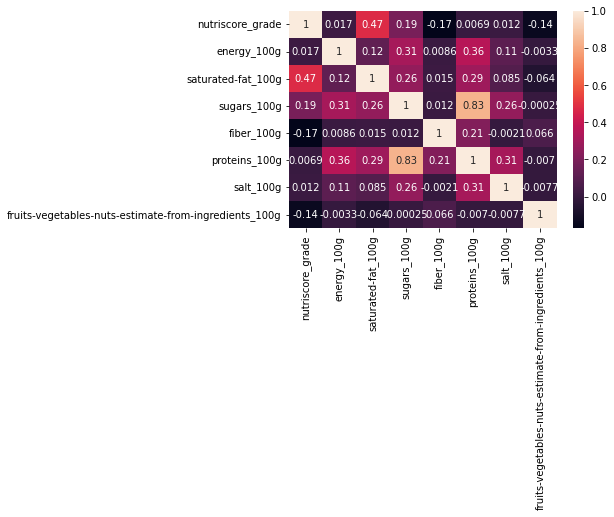

In [5]:
# Correlations to the y value.
corr_df = df.copy()
corr_df['nutriscore_grade'] = df['nutriscore_grade'].map(
                   {'a':0, 'b':1, 'c':2, 'd':3, 'e':4})

sbn.heatmap(corr_df.corr(), annot=True)

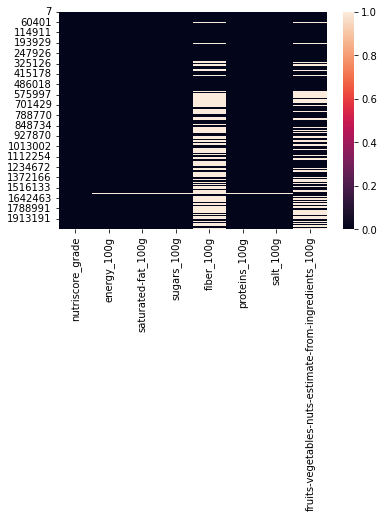

In [6]:
df_nans = sbn.heatmap(df.isna())

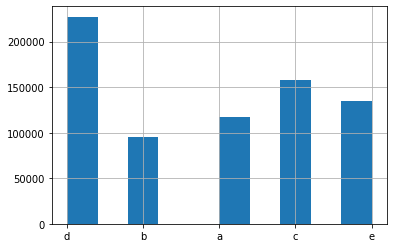

In [7]:
y_values_proportions = df['nutriscore_grade'].hist()

In [8]:
df_infos = df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731717 entries, 7 to 2059350
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   nutriscore_grade                                       731717 non-null  object 
 1   energy_100g                                            729668 non-null  float64
 2   saturated-fat_100g                                     729579 non-null  float64
 3   sugars_100g                                            729606 non-null  float64
 4   fiber_100g                                             398238 non-null  float64
 5   proteins_100g                                          729628 non-null  float64
 6   salt_100g                                              730055 non-null  float64
 7   fruits-vegetables-nuts-estimate-from-ingredients_100g  503098 non-null  float64
dtypes: float64(7), object(1)
memory us

In [9]:
from sklearn.impute import SimpleImputer

df_nan_to_mean = df.copy()

# Every nan in float columns as average in the df_nan_to_mean.
for col in df_nan_to_mean:
    if df_nan_to_mean[col].dtypes == float:
        col_mean = df_nan_to_mean[col].mean()
        df_nan_to_mean[col] = df_nan_to_mean[col].fillna(col_mean)
        df_nan_to_mean[col] = pd.to_numeric(df_nan_to_mean[col], errors = 'coerce')


        
        
# Fruits and vegetables nans to the mean.
fruit_veg = df['fruits-vegetables-nuts-estimate-from-ingredients_100g'].mean()
df['fruits-vegetables-nuts-estimate-from-ingredients_100g'] = df['fruits-vegetables-nuts-estimate-from-ingredients_100g'].fillna(fruit_veg)
df['fruits-vegetables-nuts-estimate-from-ingredients_100g'] = pd.to_numeric(df['fruits-vegetables-nuts-estimate-from-ingredients_100g'] ,errors = 'coerce')

In [10]:
X = df.drop(["nutriscore_grade"], axis=1)
y = df["nutriscore_grade"]

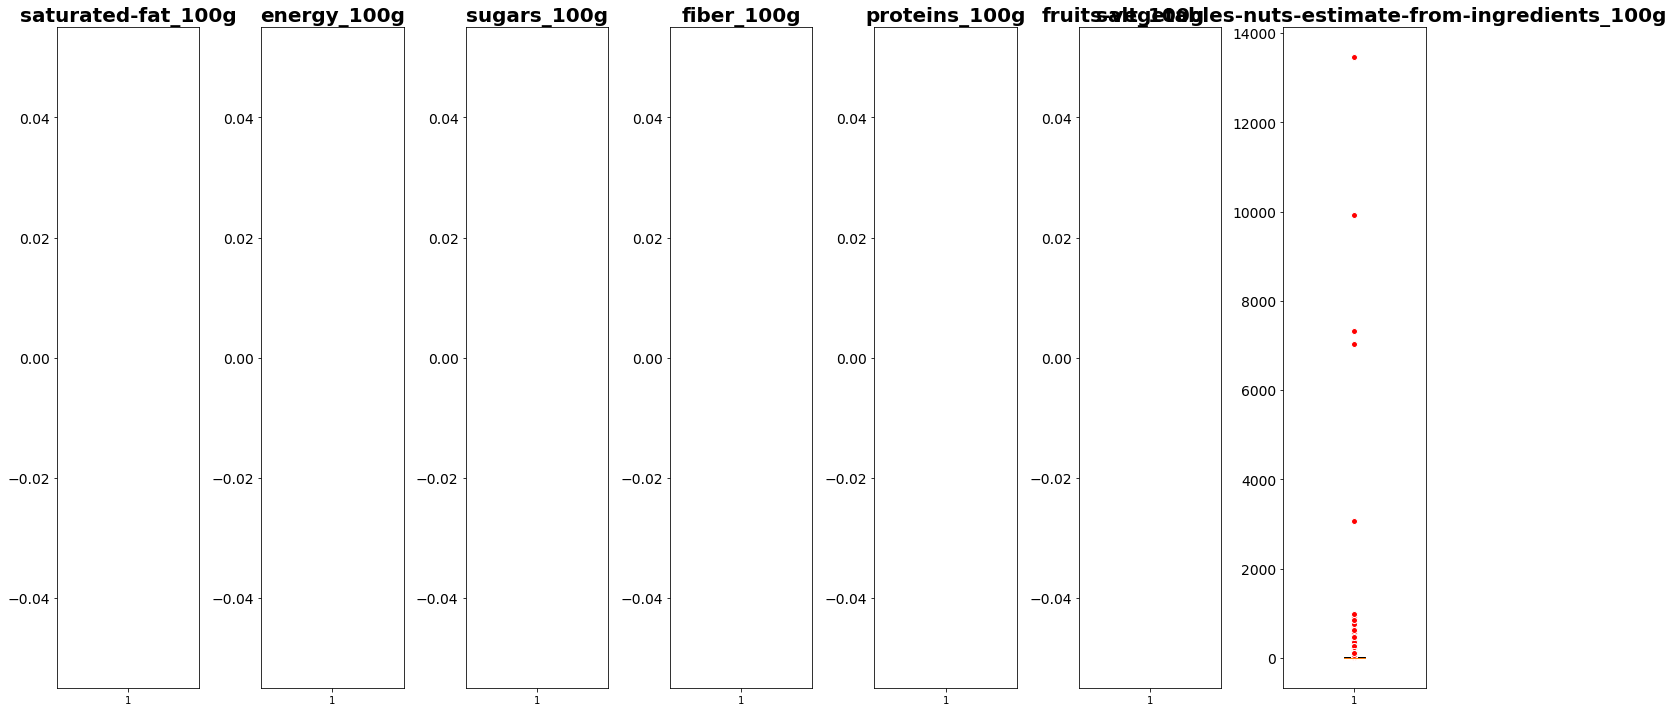

In [11]:
import matplotlib.pyplot as plt

# Creating subplot of each column with its own scale.
col_100 = ['saturated-fat_100g', 'energy_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
                  
fig, axs = plt.subplots(1, len(df[col_100].columns), figsize=(20, 10))
                  
for i, ax in enumerate(axs. flat):
    ax.boxplot(df[col_100].iloc[:,i],flierprops=red_circle)
    ax.set_title(df[col_100].columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y' , labelsize=14)
                     
plt.tight_layout()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731717 entries, 7 to 2059350
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   nutriscore_grade                                       731717 non-null  object 
 1   energy_100g                                            729668 non-null  float64
 2   saturated-fat_100g                                     729579 non-null  float64
 3   sugars_100g                                            729606 non-null  float64
 4   fiber_100g                                             398238 non-null  float64
 5   proteins_100g                                          729628 non-null  float64
 6   salt_100g                                              730055 non-null  float64
 7   fruits-vegetables-nuts-estimate-from-ingredients_100g  731717 non-null  float64
dtypes: float64(7), object(1)
memory us

<AxesSubplot:>

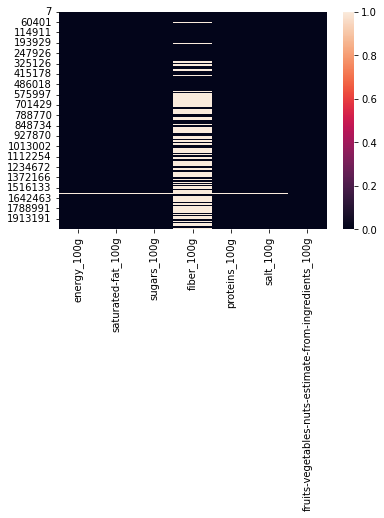

In [13]:
sbn.heatmap(X.isna())

In [14]:
import numpy as np

# Replace every nan value to 0 in X.
df = df.replace(np.nan, 0)


In [15]:
import numpy as np

# Removing all data that is more than 1-100 in the columns where that range is their min-max.
col_100 = ['saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']
for col in col_100:
    if df[col].dtypes == float:
        df = df[(df[col] <= 100) & (df[col] >= 0)]

In [16]:
X = df.drop(["nutriscore_grade"], axis=1)
y = df["nutriscore_grade"]

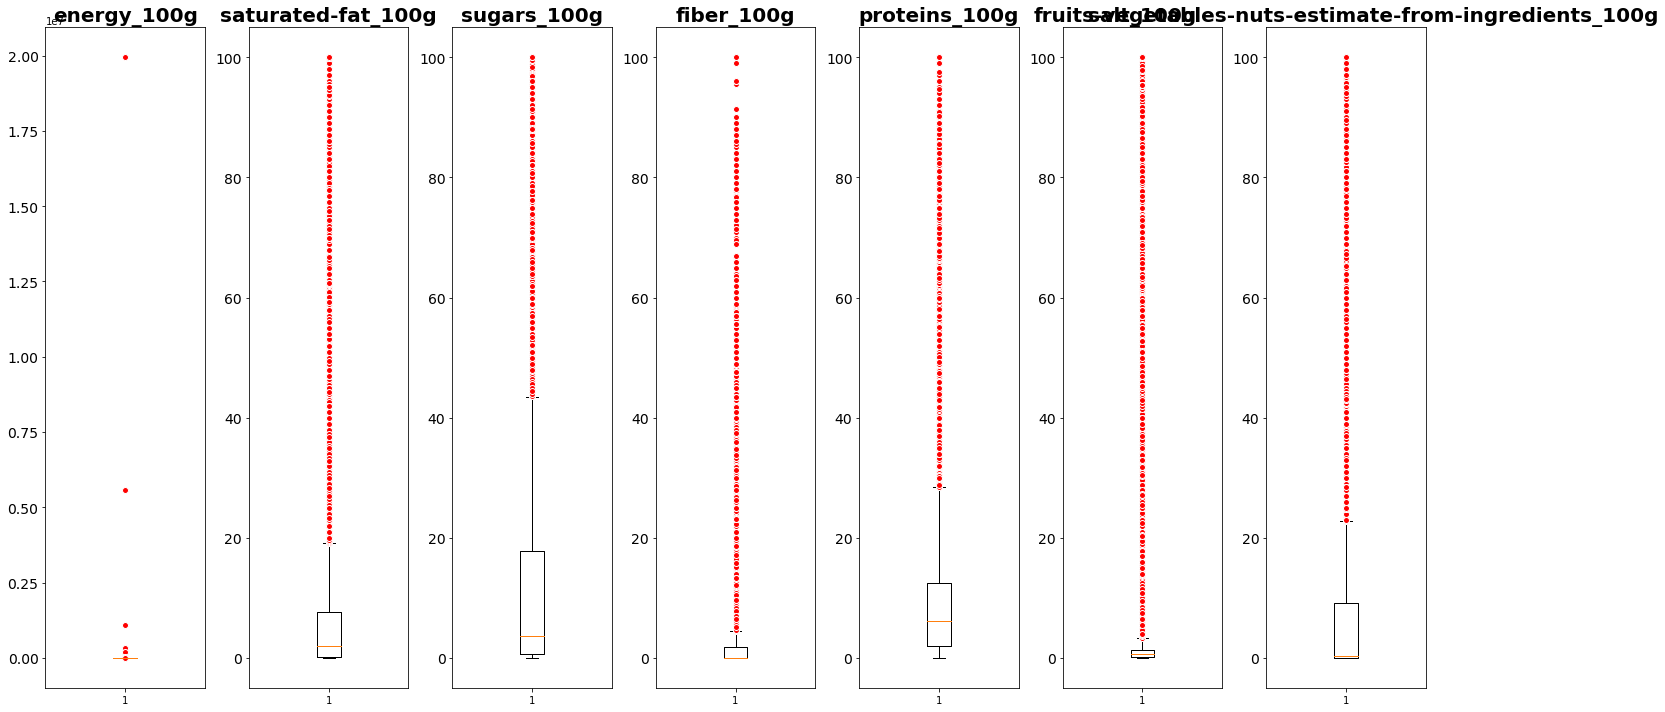

In [17]:

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
                  
fig, axs = plt.subplots(1, len(X.columns), figsize=(20, 10))
         
    
for i, ax in enumerate(axs. flat):
    ax.boxplot(X.iloc[:,i],flierprops=red_circle)
    ax.set_title(X.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params (axis='y' , labelsize=14)
                     
plt.tight_layout()

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730667 entries, 7 to 2059350
Data columns (total 7 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   energy_100g                                            730667 non-null  float64
 1   saturated-fat_100g                                     730667 non-null  float64
 2   sugars_100g                                            730667 non-null  float64
 3   fiber_100g                                             730667 non-null  float64
 4   proteins_100g                                          730667 non-null  float64
 5   salt_100g                                              730667 non-null  float64
 6   fruits-vegetables-nuts-estimate-from-ingredients_100g  730667 non-null  float64
dtypes: float64(7)
memory usage: 44.6 MB


<AxesSubplot:>

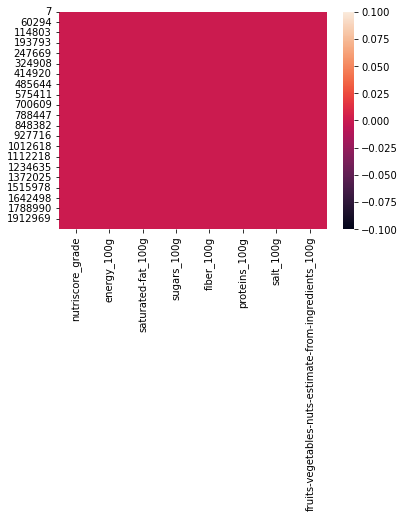

In [19]:
sbn.heatmap(df.isna())

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730667 entries, 7 to 2059350
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   nutriscore_grade                                       730667 non-null  object 
 1   energy_100g                                            730667 non-null  float64
 2   saturated-fat_100g                                     730667 non-null  float64
 3   sugars_100g                                            730667 non-null  float64
 4   fiber_100g                                             730667 non-null  float64
 5   proteins_100g                                          730667 non-null  float64
 6   salt_100g                                              730667 non-null  float64
 7   fruits-vegetables-nuts-estimate-from-ingredients_100g  730667 non-null  float64
dtypes: float64(7), object(1)
memory us

In [28]:
df.var()

/tmp/ipykernel_27308/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


energy_100g                                              5.895242e+08
saturated-fat_100g                                       6.582172e+01
sugars_100g                                              3.373073e+02
fiber_100g                                               1.329103e+01
proteins_100g                                            8.004066e+01
salt_100g                                                9.959128e+00
fruits-vegetables-nuts-estimate-from-ingredients_100g    3.331074e+02
dtype: float64

In [22]:
# dump(df, 'df_version001.joblib')

In [23]:
from imblearn.over_sampling import SMOTE

# X and y oversampeled using smote.
sm = SMOTE(random_state=42) 

X_over, y_over = sm.fit_resample(X, y)

print(y_over.value_counts())

d    227067
b    227067
a    227067
c    227067
e    227067
Name: nutriscore_grade, dtype: int64


<AxesSubplot:>

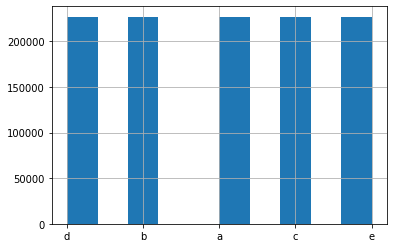

In [24]:
# See proportoin of y oversampled.
y_over.hist()

In [25]:
from imblearn.under_sampling import RandomUnderSampler

# X and y under sampled randomly.
rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X, y)

print(y_under.value_counts())



a    95313
b    95313
c    95313
d    95313
e    95313
Name: nutriscore_grade, dtype: int64


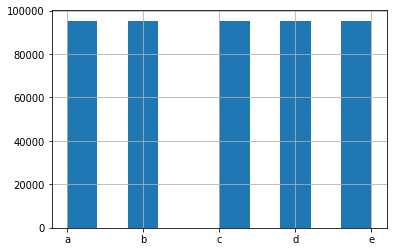

In [26]:
hist_y_undersampled = y_under.hist()

In [27]:
# storing all df's to be used in other notebooks
%store X y X_under y_under X_over y_over df

Stored 'X' (DataFrame)
Stored 'y' (Series)
Stored 'X_under' (DataFrame)
Stored 'y_under' (Series)
Stored 'X_over' (DataFrame)
Stored 'y_over' (Series)
Stored 'df' (DataFrame)
